<a href="https://colab.research.google.com/github/mingmingbupt/tensorflow/blob/master/tf_keras_regression_customized_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0-rc1
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.2
pandas 0.25.3
sklearn 0.22.2.post1
tensorflow 2.2.0-rc1
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [7]:
# Dense layer里面到底做了什么操作呢？
layer = tf.keras.layers.Dense(100)  #这个100是这个全连接层的神经单元数目，
# 一般我们会把tf.keras.layers.Dense(100) 放到Sequential里面去，或者model里面去，这是我们对dense layer的使用方法。
# 我们使用dense layer的时候，一般也会指定另一个参数，也就是input_shpae,这个参数呢，它指定的是这个dense layer的输入
# 我们需要他一般是在第一层的时候，也就是跟数据相连接的时候，我们一般会需要它。
# 当然了，你不指定他也没关系，因为他在第一次运行的时候，会自动推导出来数据的size，然后给设置好input_shpae
# 但是呢，如果你想明确指定他的话，一般情况下，我们就是在第一层的时候指定他，
layer = tf.keras.layers.Dense(100, input_shape=(None, 5)) 

# 除了在Sequentital和model里使用dense layer呢，在tensor2.0里，对于这些layer呢， 都可以用像使用一个函数一样去使用它
# 在tensorflow2.0里面有了eager mode，所有层次呢其实都可以像调用一个函数一样去调用它
# 我们看下这个layer使用函数式调用
# 这里我们只看第二个layer
# 它的输入是样本数*5，这个None表示不定值
# 他的输出是一个None*100的矩阵
layer(tf.zeros([10, 5])) # 看下是否可以像调函数一样去调用它，这里输入是一个10*5的矩阵，对应的呢，这里的none就成了10，所以他的输出呢应该是一个10*100的矩阵
#确实得到了一个10*100的矩阵，

<tf.Tensor: shape=(10, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.,

In [8]:
# 接下来我们看下，在layer里到底有什么样的东西
# 其中layer 有很多很有用的方法，其中一个方法就是layer.variables
layer.variables
#我们看到输出有两部分，kernel和 bias
#所谓的dense layer呢，其他他是一个全连接层。
#比如说我的输入是x,dense layer做的事情呢我们用一个矩阵，也就是这里面的kernal乘以x然后呢，再加上bias
#这样就是dense layer所做的事情。
# layer.variables
# x * w + b

[<tf.Variable 'dense_3/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[ 0.16213135,  0.04339187, -0.03057945,  0.10188054,  0.12912937,
          0.0089712 , -0.09927794,  0.18932275,  0.17290662, -0.05221225,
         -0.15769206, -0.06225094,  0.17416622,  0.22201873,  0.1127174 ,
          0.10552914, -0.02248588, -0.1126681 , -0.12962633, -0.03347874,
         -0.14773762,  0.12251629, -0.03301926,  0.19482295, -0.15072107,
         -0.15177408,  0.02915592,  0.22923307, -0.20157862, -0.05644627,
         -0.0604898 , -0.23824224, -0.1214857 , -0.06090181,  0.05332609,
         -0.01862375, -0.05088422, -0.0583276 , -0.22914782,  0.23612277,
          0.16817226, -0.22506604, -0.02890442,  0.13878135, -0.16185369,
          0.03401037, -0.09002452,  0.18756975,  0.07682921,  0.20113726,
          0.17817782,  0.04042436, -0.02085274,  0.1067854 ,  0.20344798,
         -0.00945473, -0.10824601,  0.02517514, -0.21749128, -0.1431992 ,
         -0.20757712, -0.08742569, -0.1925

In [9]:
# 另一个比较重要的参数就是trainable_variables，即所有可训练参数。也是kernel 和bias
# x * w + b
# kernel相当于w, bias相当于b
# layer里面其他函数 可以通过help来进行查看，
layer.trainable_variables


[<tf.Variable 'dense_3/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[ 0.16213135,  0.04339187, -0.03057945,  0.10188054,  0.12912937,
          0.0089712 , -0.09927794,  0.18932275,  0.17290662, -0.05221225,
         -0.15769206, -0.06225094,  0.17416622,  0.22201873,  0.1127174 ,
          0.10552914, -0.02248588, -0.1126681 , -0.12962633, -0.03347874,
         -0.14773762,  0.12251629, -0.03301926,  0.19482295, -0.15072107,
         -0.15177408,  0.02915592,  0.22923307, -0.20157862, -0.05644627,
         -0.0604898 , -0.23824224, -0.1214857 , -0.06090181,  0.05332609,
         -0.01862375, -0.05088422, -0.0583276 , -0.22914782,  0.23612277,
          0.16817226, -0.22506604, -0.02890442,  0.13878135, -0.16185369,
          0.03401037, -0.09002452,  0.18756975,  0.07682921,  0.20113726,
          0.17817782,  0.04042436, -0.02085274,  0.1067854 ,  0.20344798,
         -0.00945473, -0.10824601,  0.02517514, -0.21749128, -0.1431992 ,
         -0.20757712, -0.08742569, -0.1925

In [10]:
help(layer) # 通过help 可以看到layer里的其他方法

Help on Dense in module tensorflow.python.keras.layers.core object:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 1 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every sub-tensor of shape `(1, 1, d1)`
 |  (the

In [11]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [12]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [14]:
# 下面是通过子类的方法完成了自定义的tensor layer的实现
# 自定义的dense layer，我们需要定义一个子类
# 实现了三个方法，三个方法分别实现了三个功能
# 对于tensor lyaer这种带参数的layer呢，我们定义了一个子类，感觉还不是那么重
# 如果我们只是像把要把一个随意的简单的函数定义为一个层次呢，如果他里面没有参数
# 这样呢，这个build函数就完全没有必要了，然后我们整个类就比较小，也不是那么雅观
# 然后呢，用子类实现也比较重，那么有没有比较简单的方式去构建自定义的层次呢
# 对于那些没有参数的函数，我们想把它自定义成层次呢，可以使用lambda的方式来自定义层次
# 下面演示如何使用lambda的方式来自定义层次

# 定义一个激活函数，这个激活函数的表达式呢 tf.nn.softplus 的输入是x,输出是 log(1+e^x)
# 他就相当于是一个平滑版的relu。relu在0的地方有一个折点的，这个是平滑的，是没有折点的
# 我们看到这只是一个激活函数，并没有参数，我们想把它定义为一个layer的话，我们如果使用子类的话，就会写很多行代码
# 如果使用lambda的话，只需要一行代码就可以了
# 我们定义一个变量叫customized_softplus，它使用lambda来实现，这个lambda定义在keras,layers. 
# 在lamdda里传入一个lambda表达式，这样呢一个没有参数的softplus 的对应形式就产生了
customized_softplus = keras.layers.Lambda(lambda x : tf.nn.softplus(x))
#可以使用一下，传进去一个向量，
print(customized_softplus([-10., -5., 0., 5., 10.]))


tf.Tensor([4.5417706e-05 6.7153489e-03 6.9314718e-01 5.0067153e+00 1.0000046e+01], shape=(5,), dtype=float32)


In [16]:
# customized dense layer. 
# 在模型定义这里实现自定义的dense layer
# 我们通过继承类的方式进行实现
class CustomizedDenseLayer(keras.layers.Layer): # 我写个类，它继承自keras里面的keras.layers.Layer
    # 在建立好子类的名字以后呢，我们就可以去重载里面的方法，从而实现自定义的效果
    # 对于自定义layer呢，我们需要重载以下几个方法

    # 一个就是初始化函数
    def __init__(self, units, activation=None, **kwargs): 
        # 第一个参数是units，也就是这一层的输出有多少单元，这里呢，我们建立一个变量把他存起来
        self.units = units

        # 第二个参数是activation，也就是这一层用什么样的激活函数，我们也建立一个变量把他存起来
        # 这里呢activation也是用layer来实现的
        self.activation = keras.layers.Activation(activation)

        # 接下来去调用父类的函数
        super(CustomizedDenseLayer, self).__init__(**kwargs)
        # 这样呢，我们的初始化函数就构造好了
    
    # 第二个呢，就是我们的build函数，build呢是负责所有的参数呢，都初始化起来
    def build(self, input_shape):
        """构建所需要的参数，一个是kernel,一个是bias,也就是w和b """
       
        # 首先我们构建kernel参数，这里我们构建参数的时候，我们使用的是add_weight
        # add_weight是它的父类layer里面的一个子方法,这个方法可以帮我们得到一个变量
        # 下一个参数是shape，也就是这个kernel矩阵的大小
        # x * w + b.
        # 对于x来说的话，它的input_shape:[None, a] 
        # 我们的输出呢output_shape: [None, b]
        # 那么这个矩阵w的大小呢，就是[a,b]。 即w:[a,b]
        # 所以我们kernel的维度呢，就是input_shape得后面的值，和我们的输出值
        # 接下来的一个参数initializer 他是用来决定如何初始化这个参数矩阵的，也就是kernel的初始化
        # 我们可以使用uniform或者其他方式来初始化，即我们用均匀分布的方法去初始化我们的kernel
        # 接下来我们去定义trainable，表示这个参数是可以可训练的。
        # 如果是不能被训练，也就是这个参数在训练过程中是不变的话，那么这个trainable就设置成false
        self.kernel = self.add_weight(name = 'kernel',
                                      shape = (input_shape[1], self.units),
                                      initializer = 'uniform',
                                      trainable = True)
        
        # 接下来定义bias，同样使用add_weight函数来进行定义，它的名字是bias
        # 它的shape呢，因为我们的w*x的值呢，已经是[none, b]的一个矩阵了
        # 所以我们的bias呢就是一个长度为b的向量，
        self.bias = self.add_weight(name = 'bias',
                                    shape = (self.units, ),
                                    initializer = 'zeros',
                                    trainable = True)
        # 同样要去调用父类的build函数
        super(CustomizedDenseLayer, self).build(input_shape)
    
    # 第三个呢，就是我们的call函数，这个call函数呢，就是完成一次正向计算
    # 在之前wide&deep中，跟这个比较像，不过在widedeep里面我们把init和build和到了一起
    # 而在这里呢，是分开的
    def call(self, x):
        """完成正向计算"""
        # 就是如何从输入得到输出，这里x @ self.kernel，是x和kernel做矩阵乘法，再加上bias
        # 即wx+b,再经过激活函数
        return self.activation(x @ self.kernel + self.bias)

model = keras.models.Sequential([
    #这里呢，我们就使用我们自定义的层次来构建模型
    CustomizedDenseLayer(30, activation='relu',
                         input_shape=x_train.shape[1:]),
    #这里是一个数
    CustomizedDenseLayer(1),
    #一个激活函数层
    customized_softplus,
    # keras.layers.Dense(1, activation="softplus"), 这个和customized_softplus是等价的
    # keras.layers.Dense(1), keras.layers.Activation('softplus'), 或者用两层替换 customized_softplus是等价的
])
model.summary()
model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer_2 (Cu (None, 30)                270       
_________________________________________________________________
customized_dense_layer_3 (Cu (None, 1)                 31        
_________________________________________________________________
lambda_1 (Lambda)            (None, 1)                 0         
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.1658 - val_loss: 0.6666
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5843 - val_loss: 0.5816
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5148 - val_loss: 0.5213
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4738 - val_loss: 0.4866
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4603 - val_loss: 0.4801
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4655 - val_loss: 0.5020
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4476 - val_loss: 0.4513
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4323 - val_loss: 0.4652
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4180 - val_loss: 0.4308
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4150 - val_lo

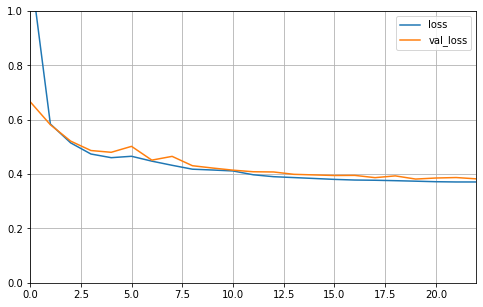

In [18]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [19]:
model.evaluate(x_test_scaled, y_test)

162/162 [==============================] - 0s 889us/step - loss: 0.3862


0.3861701488494873